# 批量构造几何图案
    已加入模块 mylibs.data.gen_gemotry
    
* 直线
    - 生成大小、类型、长度随机的直线        
* 多边形
    - 在半径为R的圆上随机选择N个点，并在圆心射线随机产生偏移量，构造多边形
* 圆形
    - 构造半径随机的圆
* 椭圆
    - 构造参数随机的椭圆

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

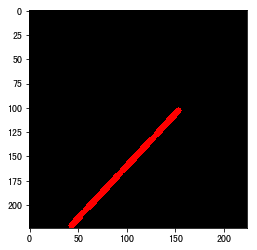

In [48]:
#构造直线
def gen_line(imgsize=(224,224,3)):
    w=imgsize[1]
    h=imgsize[0]
    img=np.zeros(imgsize,dtype=np.uint8)
    pt1=(np.random.randint(0,w//2-w//4),np.random.randint(0,h))
    pt2=(np.random.randint(w//2+w//4),np.random.randint(0,h))
    thickness=np.random.randint(1,10)
    #cv2.line(img=img,pt1=pt1,pt2=pt2,color=(255,0,0),thickness=thickness)
    cv2.line(img=img,pt1=pt1,pt2=pt2,color=(255,0,0),thickness=thickness)
    return img

img=gen_line()
plt.figure
plt.imshow(img)

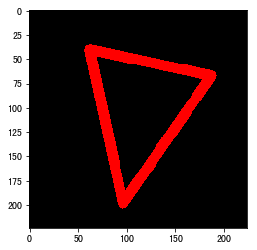

In [37]:
#构造多边形
def gen_poly(imgsize=(224,224,3),N=3,fill=False):
    w=imgsize[1]
    h=imgsize[0]
    #构建初始图形
    img=np.zeros(imgsize,dtype=np.uint8) 
    #随机设置线条大小
    thickness=np.random.randint(1,10) 
    #随机半径选择
    R=w//2 if w<h else h//2
    R=np.random.randint(10,R-10)
    #在半径为R的圆上随机选择N个点
    theta_step=2*np.pi/N
    thetas=[i*theta_step for i in range(N)]
    thetas=[theta + np.random.randint(-30,30)*theta_step/100.0 for theta in thetas]
    pts=[(R*np.cos(theta),R*np.sin(theta)) for theta in thetas]
    pts=np.array(pts).astype(np.int32)
    pts[:,0]+=w//2
    pts[:,1]+=h//2
    pts=pts.reshape((-1,1,2))
    '''这里 reshape 的第一个参数为-1, 表明这一维的长度是根据后面的维度的计算出来的。
       如果第三个参数是 False，我们得到的多边形是不闭合的（首尾不相连）。
    ''' 
    if fill:
        #填充
        cv2.fillPoly(img,[pts],color=(255,0,0))
    cv2.polylines(img,[pts],True,(255,0,0),thickness=thickness) # 图像，点集，是否闭合，颜色，线条粗细
    return img

img=gen_poly()
plt.figure
plt.imshow(img)

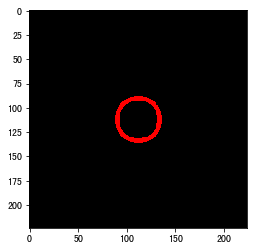

In [43]:
#构造圆
def gen_circle(imgsize=(224,224,3),fill=False):
    w=imgsize[1]
    h=imgsize[0]
    thickness=np.random.randint(1,10)
    R=np.random.randint(10,w//2-10) if w<h else np.random.randint(10,h//2-10)
    img=np.zeros(imgsize,dtype=np.uint8)
    if fill:
        thickness=-1
    cv2.circle(img=img,center=(w//2,h//2),radius=R,color=(255,0,0),thickness=thickness)
    return img

img=gen_circle()    
plt.figure
plt.imshow(img)

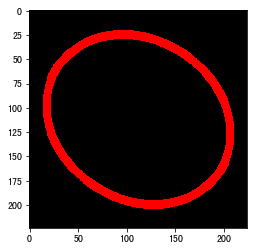

In [47]:
#构造椭圆
def gen_ellipse(imgsize=(224,224,3),fill=False):
    w=imgsize[1]
    h=imgsize[0]
    thickness=np.random.randint(1,10)
    if fill:
        thickness=-1
    a=np.random.randint(10,w//2-10)
    b=np.random.randint(10,h//2-10)
    angle=np.random.randint(0,260)
    img=np.zeros(imgsize,dtype=np.uint8)
    cv2.ellipse(img=img,center=(w//2,h//2),axes=(a,b),angle=angle,startAngle=0,endAngle=360,color=(255,0,0),thickness=thickness)
    return img

img=gen_ellipse()
plt.figure
plt.imshow(img)

## 构造训练样本
* 图像大小:224x224
* 单类样本大小:3000,train-1000,valid-1000,test-1000
* 样本类别：直线，多边形，圆，椭圆

In [52]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mylibs.data.gen_gemotry import *
#输出目录
to_path='%s/work/data/gtest/gemotry'%os.getenv('HOME')
#图像大小
imgsize=(224,224,3)
#是否填充
fill=False
#样本大小
samples={'train':10,'valid':10,'test':10}
#构造样本
for k,v in samples.items():
    #构造直线样本
    tmp_path='%s/%s/line'%(to_path,k)
    os.makedirs(tmp_path) if not os.path.exists(tmp_path) else ''
    for i in range(v):
        sfile='%s/%d.jpg'%(tmp_path,i)
        img=gen_line(imgsize)
        cv2.imwrite(sfile,img)
    #构造圆形样本
    tmp_path='%s/%s/circle'%(to_path,k)
    os.makedirs(tmp_path) if not os.path.exists(tmp_path) else ''
    for i in range(v):
        sfile='%s/%d.jpg'%(tmp_path,i)
        img=gen_circle(imgsize)
        cv2.imwrite(sfile,img)    
    #构造椭圆样本
    tmp_path='%s/%s/ellipse'%(to_path,k)
    os.makedirs(tmp_path) if not os.path.exists(tmp_path) else ''
    for i in range(v):
        sfile='%s/%d.jpg'%(tmp_path,i)
        img=gen_ellipse(imgsize)
        cv2.imwrite(sfile,img)            
    #构造多边形样本
    for n in range(3,10):
        tmp_path='%s/%s/poly%d'%(to_path,k,n)
        os.makedirs(tmp_path) if not os.path.exists(tmp_path) else ''
        for i in range(v):
            sfile='%s/%d.jpg'%(tmp_path,i)
            img=gen_poly(imgsize,n)
            cv2.imwrite(sfile,img)            
